# Análisis del riesgo de incumplimiento de los prestatarios

Este proyecto consiste en preparar un informe para la división de préstamos de un banco. Hay que averiguar si el estado civil y el número de hijos de un cliente tienen un impacto en el incumplimiento de pago de un préstamo. El banco ya tiene algunos datos sobre la solvencia crediticia de los clientes.

El informe se tendrá en cuenta al crear una **puntuación de crédito** para un cliente potencial. La **puntuación de crédito** se utiliza para evaluar la capacidad de un prestatario potencial para pagar su préstamo.

## Propósitos del proyecto e hipótesis 

El objetivo principal de este proyecto es analizar si el estado civil y la cantidad de hijos que tienen los clientes en un banco tiene algún tipo de impacto sobre el incumplimiento del pago de un préstamo. 

En base a esto, se propone comprobar las siguientes dos hipótesis si son verdaderas o no: 
- El estado civil no tiene un impacto sobre el incumplimiento en el pago de un préstamo bancario. 
- Los clientes que tengan entre 3 hijos o más suelen incumplir en el pago de los préstamos bancarios.

## Carga de librerías y datos

En este trabajo, se utilizará una librería externa que se debe instalar primero para poder utilizarla. Se llama `missingno`. 

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
# se carga todas las librerías a utilizar
import pandas as pd
import numpy as np
import missingno as msno 
import random

In [3]:
# se carga los datos
data = pd.read_csv("/datasets/credit_scoring_eng.csv")

## Exploración de datos

A continuación, tenemos una descripción general de los datos, de cada columna o variable el cual nos indica qué información contiene o se espera:

**Descripción de los datos:**
- `children` - el número de hijos en la familia
- `days_employed` - experiencia laboral en días
- `dob_years` - la edad del cliente en años
- `education` - la educación del cliente
- `education_id` - identificador de educación
- `family_status` - estado civil
- `family_status_id` - identificador de estado civil
- `gender` - género del cliente
- `income_type` - tipo de empleo
- `debt` - ¿había alguna deuda en el pago de un préstamo?
- `total_income` - ingreso mensual
- `purpose` - el propósito de obtener un préstamo

Se realizará una exploración general de los datos para revisar qué información se tiene, e incluso, revisar si existe algún problema con los datos en las columnas. 

In [4]:
# número de filas y columnas en el conjunto de datos
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


(21525, 12)

Se tiene un total de 21,525 filas con 12 columnas, el cual se identifica que hay "missing values" en las variables "days_employed" y "total_income". 

Exploremos de forma inicial cómo están los primeros 10 datos. 

In [5]:
# primeras 10 filas
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


Interesante, al parecer tenemos información inusial en la columna `days_employed` ya que muestra datos negativos y también positivos pero muy grandes. En la columna `education` al parecer hay datos duplicados implícitos, es decir, Python no los identifica que hay datos duplicados pero `secondary education` y `SECONDARY EDUCATION` son los mismos valores, solo escritos en minúsculas o mayúsculas. 

Estas son las columnas que ha simple vista se observa que hay datos raros o inusuales, sin embargo, siempre es bueno revisar de mejor manera cómo están todos los datos de cada una de las columnas. 

Se puede realizar un análisis inicial para ver cómo están los datos numéricos utilizando el método `describe()`. 

In [6]:
# Obtener información sobre los datos
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


Como se observa en la columna `children`, el valor mínimo es -1 de la cantidad de niños, y al parecer este dato es incorrecto o incoherente, ya que no se puede tener -1 hijos a nivel de una familia, sino, el valor mínimo debería ser 0. Es importante limpiar esta columna. 

De igual forma, como se mencionó anteriormente, en `days_employed` se tiene muchos valores negativos, lo cual también es una inconsistencia ya que no se puede tener un registro de días negativos que alguien ha trabajado. Algo adicional que hay que tomar en cuenta es que la desviación estándar de estos datos es muy grande, y eso quiere decir que los datos están muy dispersos y alejados de la media, indicando a la vez que hay datos atípicos o outliers. Y claramente los hay, ya que se tiene un valor mínimo de -18,388 y un valor máximo de 401,755 donde realmente la media es 63,046. Hay que investigar más de cerca por qué los datos están así y cómo se puede arreglar esto. 

Antes de realizar un análisis más profundo, verifiquemos primero cuántos valores ausentes tenemos en cada fila. 

In [7]:
# comprobación de valores ausentes
print(data.isna().sum())
print("")
print(data.columns[data.isnull().any()])

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Index(['days_employed', 'total_income'], dtype='object')


Se comprueba que solo en `days_employed` y `total_income` hay missing values, y al parecer los valores ausentes son simétricos ya que hay la misma cantidad de datos en cada una. 

Para realmente comprobar esto, vamos a filtrar los valores ausentes en las dos y ver si coinciden la cantidad total de missing values 2,174. 

In [8]:
# Veamos la tabla filtrada con valores ausentes de la primera columna donde faltan datos
missing_values = data[data.days_employed.isnull() & data.total_income.isnull()]
display(missing_values)
print(missing_values.shape)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


(2174, 12)


Efectivamente, cuando se filtra las dos columnas con missing values, se obtiene un total de 2,174 filas, por lo que la cantidad de missing values en cada columna, es simétrica. 

De igual forma, para comprobar de otra forma, se filtra separadamente cada columna. 

In [9]:
# Apliquemos múltiples condiciones para filtrar datos y veamos el número de filas en la tabla filtrada.
missing_values_de = data[data.days_employed.isnull()]
print("Missing values en `days_employed`:", len(missing_values_de))
print("")
missing_values_ti = data[data.total_income.isnull()]
print("Missing values en `total_income`:", len(missing_values_ti))

Missing values en `days_employed`: 2174

Missing values en `total_income`: 2174


Finalmente comprobamos los índices de los dos y verificamos si algún dato no es igual.

In [10]:
# se verifica si son las mismas filas
index_de = missing_values_de.index
index_ti = missing_values_ti.index
compare_index = [index_de == index_ti]
# verificamos si en compare_index hay algún False
print(compare_index)
print((compare_index[0] == False).any())

[array([ True,  True,  True, ...,  True,  True,  True])]
False


Como se obtuvo de resultado `False`, quiere decir que no hay ningún valor que no sea igual entre los dos índices de las tablas filtradas. 

De todas formas, se encontró una librería específica para analizar los valores nulos en la base de datos. 

<AxesSubplot:>

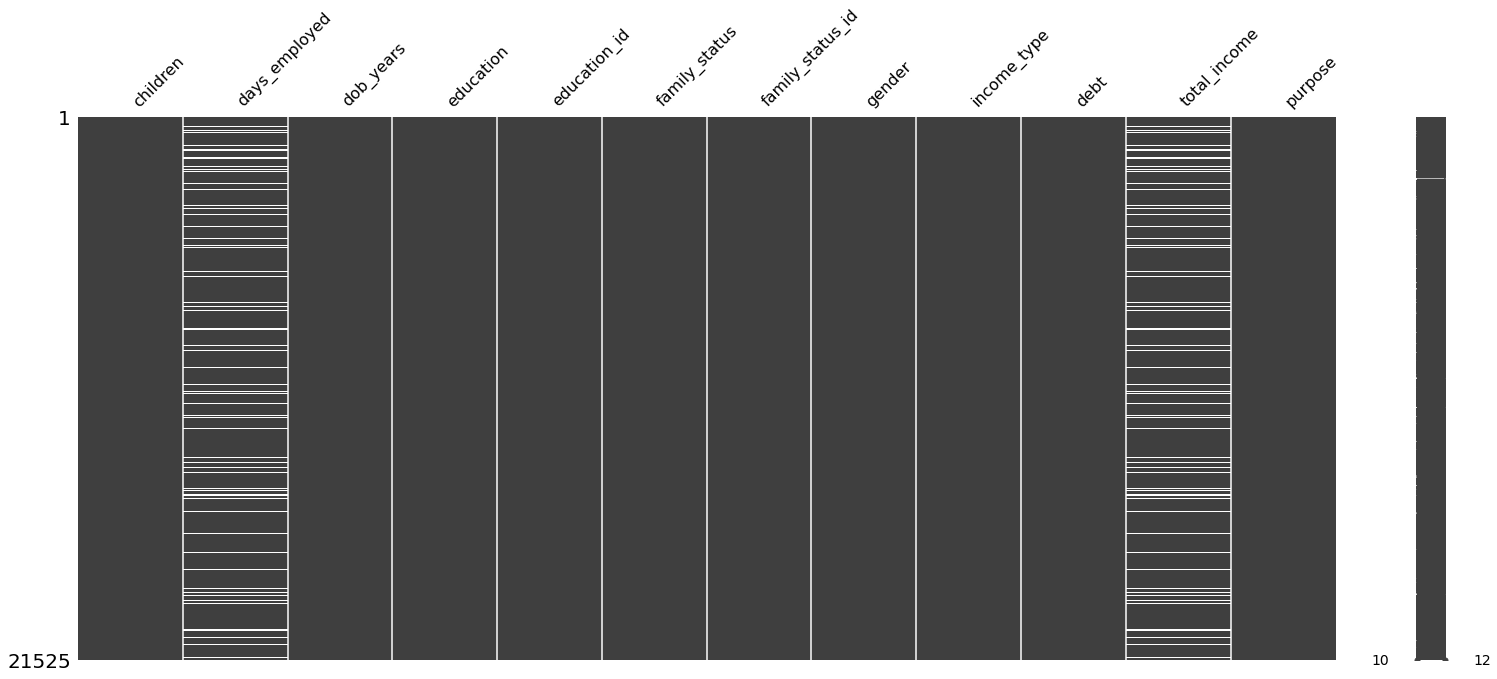

In [11]:
# matrix para ver datos ausentes en cada columna
msno.matrix(data)

Con la librería msno es otra forma de verificar los missing values, y con esta matriz visual es otra forma de identificar que en las mismas filas hay los missing values en "days_employed" y "total_income", por lo menos de forma visual, aunque sigue siendo difícil ir comparando línea por línea, tomando en cuenta que se tiene un total de 21,525 datos. 

Por último, se utiliza el heatmap de esta librería para identificar correlaciones entre la nulidad de los datos entre diferentes columnas. Si hay una correlación de 1, quiere decir que comparten los mismos valores nulos entre esas columnas. 

<AxesSubplot:>

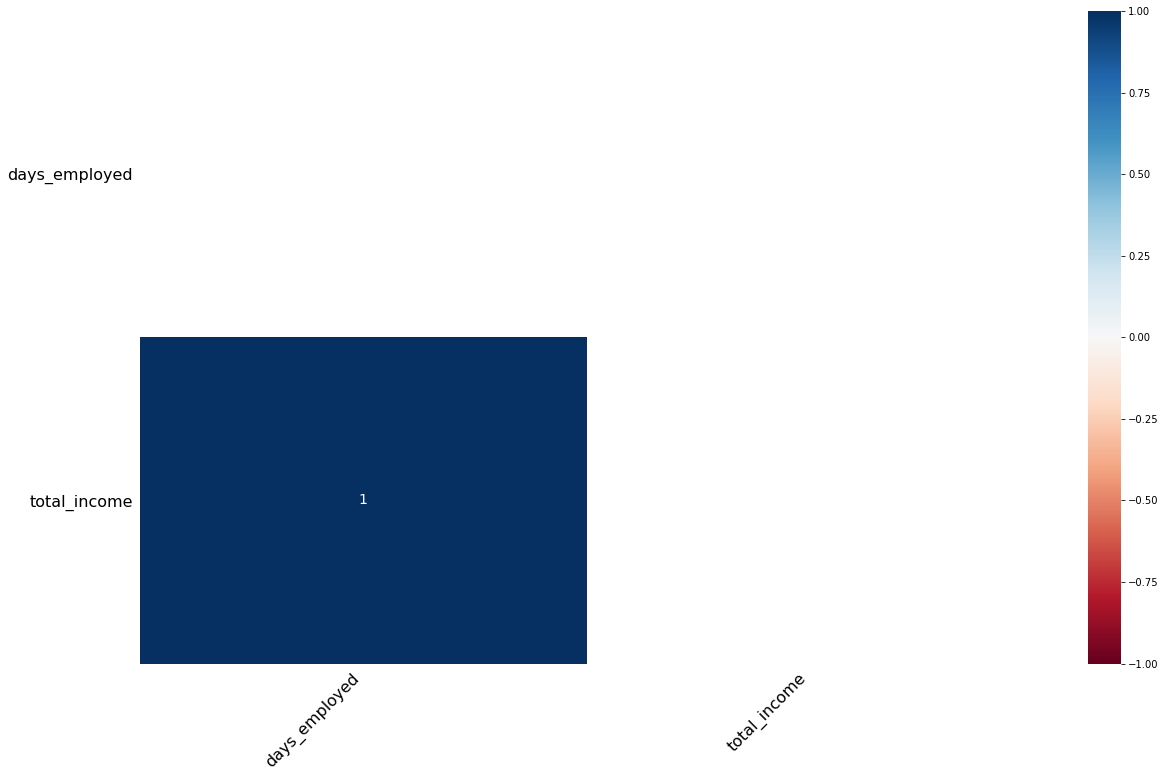

In [12]:
# heatmap msno
msno.heatmap(data)

Efectivamente, este heatmap con el 1 entre las columnas `total_income` y `days_employed` nos indica que tienen los mismos missing values en las mismas filas. 

**Conclusión intermedia**

Comprobamos que el número de valores ausentes coincide en las dos columnas, por lo que para todos estos clientes no se tiene información sobre la experiencia laboral en días y el ingreso mensual. Se debe analizar qué realizar con estas filas y datos vacíos. 

Para verificar la información que se va a perder, se calculará el porcentaje de los valores ausentes hallados en comparación con el conjunto de datos completos, y posteriormente se analizará cada en base a la frecuencia o repetición de datos de cada columna, para verificar cómo están los datos de forma general. 

In [13]:
# % de missing values por columna
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 2)))

children - 0.0%
days_employed - 10.1%
dob_years - 0.0%
education - 0.0%
education_id - 0.0%
family_status - 0.0%
family_status_id - 0.0%
gender - 0.0%
income_type - 0.0%
debt - 0.0%
total_income - 10.1%
purpose - 0.0%


Se puede observar que los missing values representan apenas un 10.1% del total de los datos. En este caso, no es un número elevado pero es representativo a nivel de la cantidad de datos que se pueden perder. 

Si se elimina todas estas filas, se perderán un total de 2,174 datos valiosos, que representan clientes, por lo que es importante primero analizar si se puede rellenar de alguna forma esta información. 

Es importante ver cómo está el comportamiento de los datos, tanto los que tienen missing values como también los que no tienen missing values. 

In [14]:
# columnas de missing_values dataframe
col_missing_values = missing_values.columns
col_missing_values

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [15]:
# distribución de datos repetidos por columna en missing values df
for col in col_missing_values:
    print ('\nFrecuencia de categorías para columna: %s'%col)
    print (missing_values[col].value_counts(normalize=True).head(10))


Frecuencia de categorías para columna: children
 0     0.661914
 1     0.218491
 2     0.093836
 3     0.016559
 20    0.004140
 4     0.003220
-1     0.001380
 5     0.000460
Name: children, dtype: float64

Frecuencia de categorías para columna: days_employed
Series([], Name: days_employed, dtype: float64)

Frecuencia de categorías para columna: dob_years
34    0.031739
40    0.030359
31    0.029899
42    0.029899
35    0.029439
36    0.028979
47    0.027139
41    0.027139
30    0.026679
28    0.026219
Name: dob_years, dtype: float64

Frecuencia de categorías para columna: education
secondary education    0.647654
bachelor's degree      0.228151
SECONDARY EDUCATION    0.030819
Secondary Education    0.029899
some college           0.025299
Bachelor's Degree      0.011500
BACHELOR'S DEGREE      0.010580
primary education      0.008740
Some College           0.003220
SOME COLLEGE           0.003220
Name: education, dtype: float64

Frecuencia de categorías para columna: education_id
1  

Ahora comparemos con la información de los datos sin los missing values, para ver cómo es su comportamiento. 

In [16]:
without_missing_values = data.dropna()
without_missing_values.shape

(19351, 12)

In [17]:
# columnas de without_missing_values dataframe
col_without_missing_values = missing_values.columns
col_without_missing_values

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [18]:
# distribución de datos repetidos por columna en without_missing_values df
for col in col_without_missing_values:
    print ('\nFrecuencia de categorías para columna: %s'%col)
    print (without_missing_values[col].value_counts(normalize=True).head(10))


Frecuencia de categorías para columna: children
 0     0.656814
 1     0.224433
 2     0.095654
 3     0.015193
 20    0.003462
-1     0.002274
 4     0.001757
 5     0.000413
Name: children, dtype: float64

Frecuencia de categorías para columna: days_employed
-327.685916       0.000052
-1580.622577      0.000052
-4122.460569      0.000052
-2828.237691      0.000052
-2636.090517      0.000052
-410.978864       0.000052
 371146.815668    0.000052
-2186.168272      0.000052
-4399.664923      0.000052
-598.186547       0.000052
Name: days_employed, dtype: float64

Frecuencia de categorías para columna: dob_years
35    0.028577
41    0.028319
38    0.028112
40    0.028061
34    0.027595
42    0.027492
33    0.027389
39    0.026975
44    0.025993
29    0.025580
Name: dob_years, dtype: float64

Frecuencia de categorías para columna: education
secondary education    0.637796
bachelor's degree      0.218180
SECONDARY EDUCATION    0.036432
Secondary Education    0.033383
some college          

Al parecer tanto el dataframe con valores ausentes `missing_values` y el dataframe sin valores ausentes `without_missing_values` tiene un comportamiento bastante similar en la cantidad de datos que se repite en cada columna. 

Como ejemplo, tenemos la columna `children` en los dos casos, la distribución de hijos que tiene cada cliente en cada grupo de datos es el mismo, incluso la cantidad de datos repartidos en cada sección. Hay poca alteración entre los datos que más se repiten en cada caso, por lo que podremos decir que el comportamiento de los datos con valores ausentes es igual al comportamiento de los datos sin valores ausentes. 

Pero, ¿qué quiere decir esto? Básicamente que los datos ausentes son aleatorios, es decir, no hay una razón específica de por qué esas filas exactas tienen valores ausentes en `days_employed` y `total_income`. 

**¿Posibles razones por las que hay valores ausentes en los datos?**

Realmente no hay ninguna específica, ya que hemos comprobado que los datos ausentes tienen igual un comportamiento igual al alzar. Puede haber varias razones de fondo, como se perdió registros de esos específicos clientes en base a los datos de esas columnas, al exportar la información hubo algún error, entre otras razones. 

Lo importante a tomar en cuenta es que el comportamiento de los datos ausentes es aleatorio. 

Ahora, veamos el comportamiento de la distribución de los datos del dataframe completo sin utilizar `normalize=True`, y veamos qué hallazgos encontramos:

In [19]:
column_names = data.columns
column_names

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [20]:
# frecuencia de datos repetidos por columna
for col in column_names:
    print ('\nFrecuencia de categorías para columna: %s'%col)
    print (data[col].value_counts().head(10))


Frecuencia de categorías para columna: children
 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Frecuencia de categorías para columna: days_employed
-327.685916       1
-1580.622577      1
-4122.460569      1
-2828.237691      1
-2636.090517      1
-410.978864       1
 371146.815668    1
-2186.168272      1
-4399.664923      1
-598.186547       1
Name: days_employed, dtype: int64

Frecuencia de categorías para columna: dob_years
35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
Name: dob_years, dtype: int64

Frecuencia de categorías para columna: education
secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
Name: educ

**Conclusión intermedia**

Con la información que tenemos arriba, podemos observar distinta información: 
- En `children` hay datos con 20 hijos y -1 hijo, lo cual podemos decir que esta información es errónea y se debe corregir. 
- En `days_employed` como ya se comprobó antes se tiene datos tipo `float` el cual indica la cantidad de días que ha trabajado una persona. Tener datos tipo float aquí es raro, pero más inusual es tener tantos datos positivos como negativos donde los datos están bastante dispersos. Hay que explorar más a detalle esta columna, tal vez dividiendo los datos positivos con los negativos. 
- En `dob_years` por lo menos los 10 primeros datos que más se repiten no muestra información inusual. 
- En `education` hay que eliminar los duplicados implícitos. Esto se puede realizar transformando todo a minúscula. 
- `education_id` debería tener la misma información que education, por lo que deberíamos tener solo 5 categorías en `education`. 
- `family_status` y `family_status_id` tienen la misma cantidad de datos que se repiten en cada categoría, y las mismas categorías por lo que se podría indicar que están bien. 
- En `gender` se tiene una tercera categoría solo 1 dato único, por lo que se podría reemplazar con la moda que es `F` de Femenino. 
- En `income_type` al parecer está bien en la mayoría aunque hay datos atípicos en las últimas 4 categorías, lo cual tal vez se podría cambiar a las categorías que más se repiten. Como son apenas 1 o 2 datos, no cambiaría el análisis o la distribución de los datos, solo reducimos la categorización. 
- En `debt` tenemos una categoría binaria de 0 y 1, por lo que quiere decir que 0 es no tienen deuda y 1 si tienen deuda. 
- En `total_income` al parecer está completamente normal los datos, tocaría ver con más detalle cómo está la distribución nuevamente. 
- En `purpose` que es la razón por la que sacan un préstamo en el banco al parecer hay duplicados implícitos, pero escritos de diferente forma como las tres primeras categorías. Hay que ver esto más a fondo. 

Junto con esto, se puede realizar ya una correción en las columnas que se indicó, tomando en cuenta de realizar siempre un análisis más profundo revisando todos los datos. 

In [21]:
# patrones estadísticos
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


Adicional de las columnas antes explicada, al parecer todas están bien. A nivel de `total_income` puede ser que haya datos atípicos, tomando en cuenta que el percentil 75 llega a 32,000 y el valor máximo se eleva a 362,496. 

**Conclusiones**

Finalmente se concluye que no hay un patrón definido de por qué hay valores ausentes. Se llegó esta conclusión comparando el comportamiento de los datos que tienen valores ausentes y los que no tienen. Verificando datos estadísticos y la frecuencia de las categorías que más se repiten, se pudo encontrar que ambos grupos de datos tienen un comportamiento bien similar en todas las columnas. 

La mejor manera para abordar los valores ausentes es verificando columna por columna cómo están los datos y ver alguna alternativa para poder reemplazar los datos. Hay que recordar que si se elimina los datos, se pierde información valiosa de los clientes. 

A continuación, se realizará una transformación exhaustiva de cada columna, corrigiendo y que esté correcto los datos en base a cada una de ellas, y el comportamiento general. 

## Transformación de datos

Es importante verificar cómo está la información actualmente de cada columna de forma más profunda, y corregir cualquier dato erróneo que se pueda presenta. 

### Análisis en `education`

Comenzamos con la eliminación de duplicados implícitos y corrección de la columna `education`.

In [22]:
# distribución de categorías en `education`
print(data["education"].value_counts(normalize=True))

secondary education    0.638792
bachelor's degree      0.219187
SECONDARY EDUCATION    0.035865
Secondary Education    0.033031
some college           0.031034
BACHELOR'S DEGREE      0.012729
Bachelor's Degree      0.012451
primary education      0.011614
Some College           0.002184
SOME COLLEGE           0.001347
PRIMARY EDUCATION      0.000790
Primary Education      0.000697
graduate degree        0.000186
GRADUATE DEGREE        0.000046
Graduate Degree        0.000046
Name: education, dtype: float64


Se procede a eliminar los duplicados implícitos, transformando todo en minúscula. 

In [23]:
# se transforma todo a minúscula
data["education"] = data["education"].str.lower()

In [24]:
# se comprueba nuevamente
print(data["education"].value_counts(normalize=True))

secondary education    0.707689
bachelor's degree      0.244367
some college           0.034564
primary education      0.013101
graduate degree        0.000279
Name: education, dtype: float64


Se logró corregir todos los duplicados, reduciendo de 15 categorías a 5 categorías, donde `secondary education` representa el 70% de los clientes y `bachelor´s degree` el 24%, siendo las dos categorías más grandes. 

### Análisis en `children`

Continuemos con la columna `children`

In [25]:
# Veamos la distribución de los valores en la columna `children`
print(data["children"].value_counts(normalize=True))

 0     0.657329
 1     0.223833
 2     0.095470
 3     0.015331
 20    0.003531
-1     0.002184
 4     0.001905
 5     0.000418
Name: children, dtype: float64


In [26]:
# Veamos la distribución de los valores en la columna `children`
print(data["children"].value_counts())

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


Se observa dos datos inusuales en la columna, el valor -1 y 20 hijos. Se concluye que estos datos son erroneos desde el ingreso de la información a la base de datos, donde puede haber sido un error humano de digitación, tomando en cuenta que el primer valor es imposible porque nadie puede tener -1 hijos, el segundo es improbable que 76 clientes tengan 20 hijos. 

Se verificará el porcentaje total de estos datos problemáticos. 

In [27]:
# porcentaje total de datos problemáticos
total_data = len(data["children"])
children_20 = len(data[data["children"] == 20])
children_minus1 = len(data[data["children"] == -1])
print(((children_minus1 + children_20)/total_data)*100)

0.5714285714285714


Estos datos problemáticos apenas representan el 0.57% de todos los datos. Como es un porcentaje pequeño, se cambiará los datos de la siguiente manera: 
- El valor de 20 se cambiará a 2, ya que se estima que el 0 está de más y el digitar 20 fue error humano. 
- El valor de -1 se cambiará a 1, ya que se estima que realmente era 1 hijo. 

Tomar en cuenta que el reemplazar los datos inconsistentes de esta manera es mínimo y puede no impactar de forma significativa en conclusiones futuras. 

In [28]:
# correción de datos erróneos
data['children'] = data['children'].replace(20, 2)
data['children'] = data['children'].replace(-1, 1)

Comprobamos que los datos reemplazados estén correctamente. 

In [29]:
# verificación de datos en `children`
print(data["children"].value_counts(normalize=True))

0    0.657329
1    0.226016
2    0.099001
3    0.015331
4    0.001905
5    0.000418
Name: children, dtype: float64


### Análisis de `dob_years`

Se revisará a continuación la columna `dob_years` que es la edad de los clientes. 

In [30]:
# conteo de datos en `dob_years`
print(data["dob_years"].value_counts())

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64


Verifiquemos a nivel de porcentajes: 

In [31]:
# conteo de datos en `dob_years` con porcentaje
print(data["dob_years"].value_counts(normalize=True))

35    0.028664
40    0.028293
41    0.028200
34    0.028014
38    0.027782
42    0.027735
33    0.026992
39    0.026620
31    0.026016
36    0.025784
44    0.025412
29    0.025319
30    0.025087
48    0.024994
37    0.024948
50    0.023879
43    0.023833
32    0.023693
49    0.023600
28    0.023368
45    0.023089
27    0.022904
56    0.022625
52    0.022485
47    0.022300
54    0.022253
46    0.022067
58    0.021417
57    0.021370
53    0.021324
51    0.020813
59    0.020627
55    0.020581
26    0.018955
60    0.017515
25    0.016585
61    0.016492
62    0.016353
63    0.012497
64    0.012311
24    0.012265
23    0.011800
65    0.009013
66    0.008502
22    0.008502
67    0.007758
21    0.005157
0     0.004692
68    0.004599
69    0.003949
70    0.003020
71    0.002695
20    0.002369
72    0.001533
19    0.000650
73    0.000372
74    0.000279
75    0.000046
Name: dob_years, dtype: float64


Reordenamos la información para comprobar: 

In [32]:
# datos ordenados de años
unique_dob_years = data["dob_years"].unique()
unique_dob_years.sort()
display(unique_dob_years)

array([ 0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75])

Al parecer hay 101 clientes que tienen 0 años de edad, lo cual es raro obtener ese tipo de datos. En total, estos representan el 0.46% de los datos. Para poder corregir estos datos, se decide analizar conjuntamente con la columna `days_employed`, para verificar cuántos días han trabajado esas personas, y ver si se puede transformar en años para sacar su posible edad. 

In [33]:
# filtro datos solo con 0
data_dy_0 = data[data.dob_years == 0]
# describe
display(data_dy_0.describe())
# primeros valores
display(data_dy_0.head())

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,101.000000,91.000000,101.0,101.000000,101.000000,101.000000,91.000000
mean,0.495050,65937.471974,0.0,0.673267,1.237624,0.079208,25334.072890
std,0.807759,143332.816768,0.0,0.512033,1.524129,0.271410,11901.096532
min,0.000000,-10689.250498,0.0,0.000000,0.000000,0.000000,5595.912000
25%,0.000000,-2258.921067,0.0,0.000000,0.000000,0.000000,15933.259000
50%,0.000000,-1146.689586,0.0,1.000000,1.000000,0.000000,24387.070000
75%,1.000000,-245.276828,0.0,1.000000,3.000000,0.000000,34007.907500
max,3.000000,400992.375704,0.0,2.000000,4.000000,1.000000,61819.782000


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541.618895,0,secondary education,1,married,0,F,retiree,0,11406.644,car
149,0,-2664.273168,0,secondary education,1,divorced,3,F,employee,0,11228.230,housing transactions
270,3,-1872.663186,0,secondary education,1,married,0,F,employee,0,16346.633,housing renovation
578,0,397856.565013,0,secondary education,1,married,0,F,retiree,0,15619.310,construction of own property
1040,0,-1158.029561,0,bachelor's degree,0,divorced,3,F,business,0,48639.062,to own a car


Al parecer ahorita no se podrá corregir los datos de `dob_years` que sean igual a cero, ya que los datos de `days_employed` están dispersos e incorrectos. Revisemos primero esta columna para ver cómo podemos proceder. 

### Análisis en `days_employed`

Comenzamos el análisis de la columna `days_employed` verificando cómo están los datos. 

In [34]:
# value_counts en `days_employed`
print(data["days_employed"].value_counts())

-327.685916     1
-1580.622577    1
-4122.460569    1
-2828.237691    1
-2636.090517    1
               ..
-7120.517564    1
-2146.884040    1
-881.454684     1
-794.666350     1
-3382.113891    1
Name: days_employed, Length: 19351, dtype: int64


Al parecer no hay datos que se repiten, comprobemos los datos únicos:

In [35]:
# longitud de los datos days_employed
print(len(data["days_employed"].unique()))

19352


Todos son datos únicos, por lo que es raro, ya que hay una gran cantidad de datos que son negativos, y son tipo float. 

Para entender mejor los datos, se va a transformar a años creando una nueva columna `years_employed`.

In [36]:
# transformación de días a años
data["years_employed"] = data["days_employed"]/365

Eliminamos la columna `days_employed` ya que la reemplaza `years_employed`.

In [37]:
# eliminar columna days_employed
data = data.drop(["days_employed"], axis=1)

Ahora que tenemos nuestros datos en años, podemos entender mejor la situación inicial de `days_employed`

Verifiquemos la información estadística de la nueva columna `years_employed`.

In [38]:
# resumen estadístico de years_employed
data["years_employed"].describe()

count    19351.000000
mean       172.730131
std        385.828252
min        -50.380685
25%         -7.527188
50%         -3.296903
75%         -0.797523
max       1100.699727
Name: years_employed, dtype: float64

Se tiene valores negativos de 50, 7, 3 años según el mínimo y los cuartiles, sin embargo el máximo valor es 1100 años. Claramente los valores están inconsistentes. Verifiquemos si tanto los valores negativos como los positivos están inconsistentes. 

Procedemos a separar en dos variables estos datos: 

In [39]:
# separación de datos positivos y negativos en years_employed
positive_years = data[data["years_employed"] > 0]
negative_years = data[data["years_employed"] <= 0]
print("Valores positivos:", positive_years.shape)
print("Valores negativos:", negative_years.shape)

Valores positivos: (3445, 12)
Valores negativos: (15906, 12)


Al parecer los datos positivos son pocos en comparación con los negativos, evaluemos qué porcentaje representan del total de los datos.

In [40]:
# porcentaje representativo de cada código
percentage_positive = len(positive_years)/len(data)*100
percentage_negative = len(negative_years)/len(data)*100
print(percentage_positive)
print(percentage_negative)
print("Total =", percentage_positive + percentage_negative)

16.004645760743323
73.89547038327527
Total = 89.9001161440186


Apenas un 16% son datos positivos, y un 74% son negativos. Tomar en cuenta que el total de estos datos, representan un 89.90%, queriendo decir que el 10.10% de los datos están faltantes. 

Ahora analicemos cómo están los valores negativos y positivos a nivel de datos estadísticos:

In [41]:
# resumen estadístico positivo `years_employed` 
positive_years["years_employed"].describe()

count    3445.000000
mean     1000.011808
std        57.739771
min       900.626632
25%       949.697024
50%      1000.584401
75%      1049.990258
max      1100.699727
Name: years_employed, dtype: float64

In [42]:
# resumen estadístico negativo `years_employed` 
negative_years["years_employed"].describe()

count    15906.000000
mean        -6.446619
std          6.312997
min        -50.380685
25%         -8.650630
50%         -4.465807
75%         -2.072252
max         -0.066141
Name: years_employed, dtype: float64

Al parecer solo los datos positivos son inconsistentes, ya que el año mínimo es 900 y el máximo es 1100, en cambio los datos negativos su valor mínimo es -50 y el máximo -0.06.

Antes de confirmar que los valores negativos están correctos, se evalúa cuántos años han trabajado según la edad. 

Esto se realiza con un pivot_table con `dob_years` y obteniendo el promedio de `years_employed`. 

In [43]:
# pivot_table de dob_years y years_employed
table_years_negative = pd.pivot_table(negative_years, 
                                      values="years_employed", 
                                      index="dob_years", 
                                      aggfunc=["mean", "median", "min", "max"])

In [44]:
# impresión datos
print(table_years_negative)

                    mean         median            min            max
          years_employed years_employed years_employed years_employed
dob_years                                                            
0              -6.028427      -4.276440     -29.285618      -0.298540
19             -1.736104      -1.984911      -2.795022      -0.306199
20             -1.876560      -1.848874      -4.240559      -0.305760
21             -1.943674      -1.695161      -5.339534      -0.141087
22             -2.140758      -1.915236      -5.771288      -0.249748
23             -2.266601      -1.890970      -7.045418      -0.192032
24             -2.812070      -2.596523      -9.274298      -0.269348
25             -2.981935      -2.518354     -10.675904      -0.221324
26             -3.288460      -2.939654     -11.648501      -0.254289
27             -3.720968      -3.152549     -12.362366      -0.235633
28             -3.829241      -3.114490     -12.920822      -0.205887
29             -4.25

De forma general, vemos que hay bastantes datos que llegan al medio año o 1 año como valor mínimo (en este caso máximo porque aún siguen en negativo), por lo que se cree que estos datos están correctos, ya que los valores máximos (en este caso mínimos), corresponden con la edad que tienen los clientes. 

- Ejemplo: si una persona tiene 43 años, el cliente con los años trabajados más grande es 27, y eso quiere decir que la edad que inició el trabajo es 16. Por lo tanto, se cree que si hay personas que han iniciado su trabajo muy tarde. 

Ahora verifiquemos la información de los valores positivos:

In [45]:
# pivot_table de dob_years y years_employed
table_years_positive = pd.pivot_table(positive_years, 
                                      values="years_employed", 
                                      index="dob_years", 
                                      aggfunc=["mean", "median", "min", "max"])

In [46]:
# impresión datos
print(table_years_positive)

                    mean         median            min            max
          years_employed years_employed years_employed years_employed
dob_years                                                            
0             993.253466    1002.925427     908.379592    1098.609249
22            917.162356     917.162356     917.162356     917.162356
26           1032.527897    1032.527897     998.214239    1066.841555
27            991.870679    1032.396126     903.511521    1039.704390
28            959.837699     959.837699     959.837699     959.837699
31            924.724567     924.724567     924.724567     924.724567
32            929.768748     921.132558     900.896837     967.276850
33           1001.779458    1001.779458     913.408222    1090.150694
34           1057.594568    1073.866504    1009.742494    1089.174705
35            985.034508     985.034508     985.034508     985.034508
36           1005.396114    1011.787284     970.951720    1033.449339
37            987.31

Claramente los datos positivos están erroneos. Es importante corregir esto, antes de transformar los valores negativos a positivos. 

Para esto, se procede a realizar otro pivot_table de los negativos, en base a la categorización de las columnas `education` y `family_status` para así poder reemplazar con la media o mediana de forma condicionada:

In [47]:
# pivot_table de negative_years con valores de years_employed y varias columnas
table_years_negative = pd.pivot_table(negative_years, 
                                      values="years_employed", 
                                      index=["dob_years", "education", "family_status"], 
                                      aggfunc=["median", "mean"])

In [48]:
# Verificación de nueva información
table_years_negative.head(20)

median           mean
                                                years_employed years_employed
dob_years education           family_status                                  
0         bachelor's degree   civil partnership      -4.819282      -6.353522
                              divorced               -4.237578      -8.123504
                              married                -4.601307      -5.791261
                              unmarried              -4.250357      -6.128044
          secondary education civil partnership      -2.501790      -5.091108
                              divorced               -8.511494      -8.158634
                              married                -4.306992      -6.524935
                              unmarried              -3.444036      -4.090620
          some college        civil partnership      -0.663976      -0.663976
19        secondary education civil partnership      -0.594228      -0.594228
                              married                -2.124618      -2.124618
                              unmarried              -1.754221      -1.655233
          some college        civil partnership      -2.597879      -2.597879
                              married                -2.183517      -2.183517
                              unmarried              -1.906764      -1.909778
20        bachelor's degree   civil partnership      -1.622105      -1.622105
                              married                -2.437520      -2.437520
                              unmarried              -1.353504      -1.538047
          secondary education civil partnership      -1.787275      -1.680105
                              divorced               -3.579166      -3.579166

Vemos que la diferencia es significativa entre la media y mediana, sin embargo, vimos antes que entre en cada edad hay una diferencia grande entre los años que trabajan las personas. Por lo tanto, es mejor utilizar la mediana.  

In [49]:
# pivot_table de negative_years con valores de years_employed y varias columnas
table_years_negative = pd.pivot_table(negative_years, 
                                      values="years_employed", 
                                      index=["dob_years", "education", "family_status"], 
                                      aggfunc="median")
table_years_negative.head(20)

years_employed
dob_years education           family_status                    
0         bachelor's degree   civil partnership       -4.819282
                              divorced                -4.237578
                              married                 -4.601307
                              unmarried               -4.250357
          secondary education civil partnership       -2.501790
                              divorced                -8.511494
                              married                 -4.306992
                              unmarried               -3.444036
          some college        civil partnership       -0.663976
19        secondary education civil partnership       -0.594228
                              married                 -2.124618
                              unmarried               -1.754221
          some college        civil partnership       -2.597879
                              married                 -2.183517
                              unmarried               -1.906764
20        bachelor's degree   civil partnership       -1.622105
                              married                 -2.437520
                              unmarried               -1.353504
          secondary education civil partnership       -1.787275
                              divorced                -3.579166

Verificamos que si depende los años trabajados según la edad, el tipo de estudio y el estatus familiar. Por lo tanto, se reemplazará los valores positivos con la mediana de estos valores negativos. Posteriormente, se transformará todo a positivo.

Para esto, se debe setear como índice `dob_years`, `education` y `family_status`.

In [50]:
# índice
data = data.set_index(["dob_years", "education", "family_status"])

In [51]:
# datos iniciales
data.head()

,,,children,education_id,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
dob_years,education,family_status,,,,,,,,,
42,bachelor's degree,married,1,0,0,F,employee,0,40620.102,purchase of the house,-23.116912
36,secondary education,married,1,1,0,F,employee,0,17932.802,car purchase,-11.026860
33,secondary education,married,0,1,0,M,employee,0,23341.752,purchase of the house,-15.406637
32,secondary education,married,3,1,0,M,employee,0,42820.568,supplementary education,-11.300677
53,secondary education,civil partnership,0,1,1,F,retiree,0,25378.572,to have a wedding,932.235814


Se agrega la columna `years_employed_mean` el cual son los promedios de cada año de trabajo, tipo de educación y estatus de familia.

In [52]:
# nueva columna `years_employed_mean`
data["years_employed_mean"] = table_years_negative["years_employed"]
data.head()

,,,children,education_id,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,years_employed_mean
dob_years,education,family_status,,,,,,,,,,
42,bachelor's degree,married,1,0,0,F,employee,0,40620.102,purchase of the house,-23.116912,-6.966121
36,secondary education,married,1,1,0,F,employee,0,17932.802,car purchase,-11.026860,-5.541782
33,secondary education,married,0,1,0,M,employee,0,23341.752,purchase of the house,-15.406637,-3.866100
32,secondary education,married,3,1,0,M,employee,0,42820.568,supplementary education,-11.300677,-3.963349
53,secondary education,civil partnership,0,1,1,F,retiree,0,25378.572,to have a wedding,932.235814,-6.581900


Ahora se reemplaza los valores positivos con los valores promedios de `years_employed_mean`:

In [53]:
# reemplazo de valores positivos a negativos en base a years_employed_mean
data['years_employed'] = data.apply(lambda x: x['years_employed_mean'] if x['years_employed']>0 else x['years_employed'], axis=1)

Se elimina la columna `years_employed_mean`.

In [54]:
# eliminar la columna years_employed_mean
data.drop("years_employed_mean", axis=1, inplace=True)

Y se reinicia el índice para volver las columnas `dob_years`, `education` y `family_status`.

In [55]:
# resetear el índice de la tabla
data.reset_index(inplace=True)

Finalmente transformamos toda la columna `years_employed` a positivo:

In [56]:
# convertimos todos los datos en positivos con .abs()
data["years_employed"] = data["years_employed"].abs()

Verificamos los datos estadísticos de la columna:

In [57]:
# resumen estadístico
data["years_employed"].describe()

count    19103.000000
mean         6.582274
std          6.001968
min          0.066141
25%          2.496998
50%          5.129869
75%          8.354350
max         50.380685
Name: years_employed, dtype: float64

Ahora sí, actualizamos la información de `data_dy_0`:

In [58]:
# filtro datos solo con 0
data_dy_0 = data[data.dob_years == 0]
# describe
display(data_dy_0.describe())
# primeros valores
display(data_dy_0.head())

,dob_years,children,education_id,family_status_id,debt,total_income,years_employed
count,101.0,101.000000,101.000000,101.000000,101.000000,91.000000,87.000000
mean,0.0,0.495050,0.673267,1.237624,0.079208,25334.072890,5.801771
std,0.0,0.807759,0.512033,1.524129,0.271410,11901.096532,5.558628
min,0.0,0.000000,0.000000,0.000000,0.000000,5595.912000,0.298540
25%,0.0,0.000000,0.000000,0.000000,0.000000,15933.259000,2.577986
50%,0.0,0.000000,1.000000,1.000000,0.000000,24387.070000,4.306992
75%,0.0,1.000000,1.000000,3.000000,0.000000,34007.907500,6.767833
max,0.0,3.000000,2.000000,4.000000,1.000000,61819.782000,29.285618


,dob_years,education,family_status,children,education_id,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
99,0,secondary education,married,0,1,0,F,retiree,0,11406.644,car,4.306992
149,0,secondary education,divorced,0,1,3,F,employee,0,11228.230,housing transactions,7.299379
270,0,secondary education,married,3,1,0,F,employee,0,16346.633,housing renovation,5.130584
578,0,secondary education,married,0,1,0,F,retiree,0,15619.310,construction of own property,4.306992
1040,0,bachelor's degree,divorced,0,0,3,F,business,0,48639.062,to own a car,3.172684


Listo, al parecer tenemos ya los valores correctos de `years_employed`. Lo que vamos a realizar aquí es reemplazar en `data` todos los valores con cero en `dob_years` en base a `years_employed`, sumando ese valor más 19, pero que sean enteros, ya que no queremos pasar los decimales. Fijamos el mínimo en 19 ya que la mayoría de clientes tiene esa edad cuando trabaja. Entonces en la primera fila de arriba si sumamos 19 más 4 sería 23 años. 

Antes de reemplazar verifiquemos nuevamente los datos de `dob_years`: 

In [59]:
# valores en dob_years
data["dob_years"].value_counts(normalize=True)

35    0.028664
40    0.028293
41    0.028200
34    0.028014
38    0.027782
42    0.027735
33    0.026992
39    0.026620
31    0.026016
36    0.025784
44    0.025412
29    0.025319
30    0.025087
48    0.024994
37    0.024948
50    0.023879
43    0.023833
32    0.023693
49    0.023600
28    0.023368
45    0.023089
27    0.022904
56    0.022625
52    0.022485
47    0.022300
54    0.022253
46    0.022067
58    0.021417
57    0.021370
53    0.021324
51    0.020813
59    0.020627
55    0.020581
26    0.018955
60    0.017515
25    0.016585
61    0.016492
62    0.016353
63    0.012497
64    0.012311
24    0.012265
23    0.011800
65    0.009013
66    0.008502
22    0.008502
67    0.007758
21    0.005157
0     0.004692
68    0.004599
69    0.003949
70    0.003020
71    0.002695
20    0.002369
72    0.001533
19    0.000650
73    0.000372
74    0.000279
75    0.000046
Name: dob_years, dtype: float64

Para esto, creamos la siguiente función que nos ayudará con el reemplazo de los datos con `dob_years` igual a 0 y tomando en cuenta que en algunos casos `years_employed` hay valores nulos: 

In [60]:
# reemplazamos los datos de 0 en dob_years
def replace_dob_years(df):
    df.loc[(df['dob_years'] == 0) & (df['years_employed'].notnull()), 'dob_years'] = df.loc[(df['dob_years'] == 0) & (df['years_employed'].notnull()), 'years_employed'].apply(lambda x: int(round(x + 19)))
    df['dob_years'] = df['dob_years'].astype(int)
    return df

In [61]:
# aplicamos la función 
data = replace_dob_years(data)

Verificamos nuevamente la información en `dob_years`

In [62]:
# valores en dob_years
data["dob_years"].value_counts(normalize=True)

35    0.028711
40    0.028293
41    0.028246
34    0.028014
38    0.027782
42    0.027735
33    0.027085
39    0.026620
31    0.026156
36    0.025784
44    0.025412
29    0.025412
30    0.025087
48    0.025087
37    0.024994
50    0.023879
32    0.023833
43    0.023833
49    0.023600
28    0.023508
45    0.023089
27    0.022904
56    0.022625
52    0.022485
47    0.022300
54    0.022253
46    0.022067
58    0.021417
57    0.021370
53    0.021324
51    0.020813
59    0.020627
55    0.020581
26    0.019187
60    0.017515
25    0.016725
61    0.016492
62    0.016353
23    0.012683
24    0.012636
63    0.012497
64    0.012311
22    0.009152
65    0.009013
66    0.008502
67    0.007758
21    0.005528
68    0.004599
69    0.003949
70    0.003020
20    0.002787
71    0.002695
72    0.001533
19    0.000790
0     0.000650
73    0.000372
74    0.000279
75    0.000046
Name: dob_years, dtype: float64

Los datos con valores en 0 han disminuido en menor cantidad. Finalmente, decidimos estos datos reemplazar por los cinco datos que más se repiten que son: 35, 40, 41, 34 y 38. De esta forma distribuimos de mejor forma los datos y no solo a uno en específico. 

Creamos la siguiente función `replace_zeros`:

In [63]:
# función para reemplazar los datos que más se repiten
def replace_zeros(df):
    df.loc[df['dob_years'] == 0, 'dob_years'] = random.choice([35, 40, 41, 34, 38])
    return df

In [64]:
# aplicamos la función
data = replace_zeros(data)

In [65]:
# valores en dob_years
data["dob_years"].value_counts(normalize=True)

35    0.029361
40    0.028293
41    0.028246
34    0.028014
38    0.027782
42    0.027735
33    0.027085
39    0.026620
31    0.026156
36    0.025784
29    0.025412
44    0.025412
30    0.025087
48    0.025087
37    0.024994
50    0.023879
43    0.023833
32    0.023833
49    0.023600
28    0.023508
45    0.023089
27    0.022904
56    0.022625
52    0.022485
47    0.022300
54    0.022253
46    0.022067
58    0.021417
57    0.021370
53    0.021324
51    0.020813
59    0.020627
55    0.020581
26    0.019187
60    0.017515
25    0.016725
61    0.016492
62    0.016353
23    0.012683
24    0.012636
63    0.012497
64    0.012311
22    0.009152
65    0.009013
66    0.008502
67    0.007758
21    0.005528
68    0.004599
69    0.003949
70    0.003020
20    0.002787
71    0.002695
72    0.001533
19    0.000790
73    0.000372
74    0.000279
75    0.000046
Name: dob_years, dtype: float64

Finalmente, los datos no cambiaron en proporción, y se pudo eliminar el dato erróneo de edad que era 0.

### Análisis de `family_status`

Ahora revisamos la columna `family_status`

In [66]:
# Veamos los valores de la columna
print(data["family_status"].value_counts())

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64


Según los datos analizados de la columna `family_status`, no se tiene ningún valor problemático, por lo que no es necesario arreglarlos. 

### Análisis `gender`

Continuemos con la columna `gender`. 

In [67]:
# Veamos los valores en la columna
print(data["gender"].value_counts())

F      14236
M       7288
XNA        1
Name: gender, dtype: int64


Se tiene un dato con el valor XNA, el cual puede ser alguien que no se identifique con másculino o femenino, o no se tenía esa información a la mano, o un error de información. 

Para esto, se reemplazará el valor con "F", siendo Femenino, y el dato que más se repite en esta categoría. 

In [68]:
# reemplazo de dato
data['gender'] = data['gender'].replace("XNA", "F")

In [69]:
# verificación de datos corregidos
print(data["gender"].value_counts())

F    14237
M     7288
Name: gender, dtype: int64


### Análisis en `income_type`

Ahora sigamos con la columna `income_type`. 

In [70]:
# Veamos los valores en la columna
print(data["income_type"].value_counts())

employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64


In [71]:
# porcentaje en los datos según categorías
print(data["income_type"].value_counts(normalize=True))

employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
unemployed                     0.000093
entrepreneur                   0.000093
paternity / maternity leave    0.000046
student                        0.000046
Name: income_type, dtype: float64


Tenemos valores atípicos o cuatro categorías que no se repiten mucho. Eliminar estas categorías afectaría poco en la información de los datos en general, sin embargo, por temas de no afectar tanto a los datos, se las deja intacta. 

### Análisis en `total_income`

Sigamos con la columna `total_income` donde verificamos cómo está la distribución de los datos a nivel estadístico. 

In [72]:
data["total_income"].describe()

count     19351.000000
mean      26787.568355
std       16475.450632
min        3306.762000
25%       16488.504500
50%       23202.870000
75%       32549.611000
max      362496.645000
Name: total_income, dtype: float64

Sin tomar en cuenta los valores ausentes de la columna, al parecer los valores sobre el ingreso mensual de los clientes está correcto. Aunque hay que tomar en cuenta que hay mucha separación entre el dato mínimo y máximo, siendo el ingreso mensual mínimo de 3,306 y el máximo de 362,496. Lo importante a resaltar es que el 75% de los datos tienen un ingreso mensual de 32,539. Esto quiere decir que hay datos atípicos que afectan sobre todo al promedio del ingreso total. Más adelante se podría realizar un estudio general de cómo eliminar de forma correcta estos datos atípicos. 

Finalmente, se concluye que los datos de esta columna están correctos.

### Análisis en `debt`

Verifiquemos cómo está la columna `debt`: 

In [73]:
data["debt"].value_counts(normalize=True)

0    0.919117
1    0.080883
Name: debt, dtype: float64

Al parecer no hay datos erroneos en esta columna, sin embargo, podemos ver que casi el 92% de clientes no tienen ninguna deuda `(0)` y el 8% si tienen deuda `(1)`. Es importante luego comparar si hay algún patrón específico sobre el comportamiento de los clientes que tienen deuda. 

### Análisis en `purpose`

Por último, analizamos la columna `purpose`: 

In [74]:
data["purpose"].value_counts(normalize=True)

wedding ceremony                            0.037027
having a wedding                            0.036098
to have a wedding                           0.035958
real estate transactions                    0.031405
buy commercial real estate                  0.030848
housing transactions                        0.030337
buying property for renting out             0.030337
transactions with commercial real estate    0.030244
housing                                     0.030058
purchase of the house                       0.030058
purchase of the house for my family         0.029779
construction of own property                0.029501
property                                    0.029454
transactions with my real estate            0.029268
building a real estate                      0.029082
buy real estate                             0.028990
purchase of my own house                    0.028804
building a property                         0.028804
housing renovation                          0.

In [75]:
len(data["purpose"].value_counts(normalize=True))

38

Claramente se puede observar que hay ciertas categorías repetidas, las cuales se puede simplificar uniendo la información y así tener menos categorías y ya no 38. 

Para realizar esto, se crea la siguiente función: 

In [76]:
# función para `purpose` que unirá categorías
def purpose_group(row):
    purpose = row["purpose"]
    
    if "wedding" in purpose: 
        return "wedding ceremony"
    if "real estate" in purpose:
        return "real estate transactions"
    if "education" in purpose: 
        return "getting an education"
    if "educated" in purpose:
        return "getting an education"
    if "university" in purpose:
        return "getting an education"
    if "car" in purpose:
        return "purchase of a car"
    if "housing" in purpose:
        return "housing transactions"
    if "house" in purpose:
        return "housing transactions"
    if "property" in purpose:
        return "housing transactions"

In [77]:
# se aplica la función
data["purpose_1"] = data.apply(purpose_group, axis=1)

Se comprueba que se tenga la misma cantidad de datos en las dos columnas.

In [78]:
# conteo de categorías
print(data["purpose"].value_counts(normalize=True))
print()
print(data["purpose_1"].value_counts(normalize=True), "\n")

# verificación de total de datos en cada columna
print(len(data["purpose"]))
print(len(data["purpose_1"]))

wedding ceremony                            0.037027
having a wedding                            0.036098
to have a wedding                           0.035958
real estate transactions                    0.031405
buy commercial real estate                  0.030848
housing transactions                        0.030337
buying property for renting out             0.030337
transactions with commercial real estate    0.030244
housing                                     0.030058
purchase of the house                       0.030058
purchase of the house for my family         0.029779
construction of own property                0.029501
property                                    0.029454
transactions with my real estate            0.029268
building a real estate                      0.029082
buy real estate                             0.028990
purchase of my own house                    0.028804
building a property                         0.028804
housing renovation                          0.

Eliminamos la columna `purpose`, y renombramos a `purpose_1` con `purpose`: 

In [79]:
# eliminar y renombrar
data = data.drop("purpose", 1)
data.rename(columns = {'purpose_1':'purpose'}, inplace = True)

In [80]:
# verificamos la información
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dob_years         21525 non-null  int64  
 1   education         21525 non-null  object 
 2   family_status     21525 non-null  object 
 3   children          21525 non-null  int64  
 4   education_id      21525 non-null  int64  
 5   family_status_id  21525 non-null  int64  
 6   gender            21525 non-null  object 
 7   income_type       21525 non-null  object 
 8   debt              21525 non-null  int64  
 9   total_income      19351 non-null  float64
 10  years_employed    19103 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Se redujo a 5 categorías de por qué piden un préstamo. Aquí nos podemos dar cuenta que la razón principal no es por realizar una boda, sino por alguna transacción de vivienda como comprar una casa, remodelar, comprar un terreno, etc. De ahí la segunda razón es transacciones inmobiliarias como construir una inmobiliaria, comprar bienes raíces comerciales, entre otros. Los otros dos son comprar un carro y tener una mejor educación, y finalmente realizar una boda, siendo la última categoría. 

### Datos duplicados

Ahora con todas las columnas limpias, verifiquemos si hay datos duplicados. 

In [81]:
# Comprobar los duplicados
print(data.duplicated().any())

True


In [82]:
# Comprobar cantidad de datos duplicados
print(data.duplicated().sum())

317


Verificamos que hay 317 filas con datos duplicados, por lo tanto es importante limpiar todos estos datos. 

In [83]:
# Datos actuales, antes de verificar los duplicados
data.shape

(21525, 12)

In [84]:
# eliminación de duplicados
data_wd = data.drop_duplicates().reset_index(drop=True)

In [85]:
# Verificación del nuevo conjunto de datos. 
data_wd.info()
data_wd.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21208 entries, 0 to 21207
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dob_years         21208 non-null  int64  
 1   education         21208 non-null  object 
 2   family_status     21208 non-null  object 
 3   children          21208 non-null  int64  
 4   education_id      21208 non-null  int64  
 5   family_status_id  21208 non-null  int64  
 6   gender            21208 non-null  object 
 7   income_type       21208 non-null  object 
 8   debt              21208 non-null  int64  
 9   total_income      19351 non-null  float64
 10  years_employed    19103 non-null  float64
 11  purpose           21208 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.9+ MB


(21208, 12)

In [86]:
# se comprueba si hay duplicates
print(data_wd.duplicated().any())

False


El nuevo conjunto de datos se llama `data_wd` (data without duplicates). Se ha arreglado la base de datos en general, ya que se tenía datos repetidos en categorías el cual estaban algunas mal escritas, otras con datos raros o no consistentes, y otras con valores negativos que no hacían sentido. 

Finalmente, se eliminó 317 valores repetidos, quedándonos con 21,208 datos de clientes. 

# Trabajar con valores ausentes

Ahora que tenemos todos los datos limpios, verifiquemos la información acerca del ID con cada categoría correspondiente, según la columna. 

In [87]:
# Comprobar todos los valores en la columna para asegurarnos de que los hayamos corregido
print(data_wd["education"].value_counts(normalize=True))

secondary education    0.704923
bachelor's degree      0.246416
some college           0.035081
primary education      0.013297
graduate degree        0.000283
Name: education, dtype: float64


In [88]:
# Comprobar todos los valores en la columna para asegurarnos de que los hayamos corregido
print(data_wd["education_id"].value_counts(normalize=True))

1    0.704923
0    0.246416
2    0.035081
3    0.013297
4    0.000283
Name: education_id, dtype: float64


In [89]:
# Comprobar todos los valores en la columna para asegurarnos de que los hayamos corregido
print(data_wd["family_status"].value_counts(normalize=True))

married              0.572897
civil partnership    0.194596
unmarried            0.131554
divorced             0.056300
widow / widower      0.044653
Name: family_status, dtype: float64


In [90]:
# Comprobar todos los valores en la columna para asegurarnos de que los hayamos corregido
print(data_wd["family_status_id"].value_counts(normalize=True))

0    0.572897
1    0.194596
4    0.131554
3    0.056300
2    0.044653
Name: family_status_id, dtype: float64


Prácticamente tenemos el mismo porcentaje en cada categoría tanto en `education` y `education_id`, como también en `family_status` y `family_status_id`. 

Para asegurar la información que tenemos, podemos unir los IDs con las categorías correspondientes. 

In [91]:
# impresión de columnas
print(data_wd.columns)

Index(['dob_years', 'education', 'family_status', 'children', 'education_id',
       'family_status_id', 'gender', 'income_type', 'debt', 'total_income',
       'years_employed', 'purpose'],
      dtype='object')


Unión de IDs con columnas de `family_status` y `family_status_id`

In [92]:
# valores de family_status
column_values = data_wd[["family_status", "family_status_id"]].values
print(column_values)

[['married' 0]
 ['married' 0]
 ['married' 0]
 ...
 ['civil partnership' 1]
 ['married' 0]
 ['married' 0]]


Se transforma en un array o lista de listas, y se separa todo. 

In [93]:
column_values = data_wd[["family_status", "family_status_id"]].values.ravel()
print(column_values)

['married' 0 'married' ... 0 'married' 0]


Y finalmente sacamos los valores únicos

In [94]:
unique_values_family_status =  pd.unique(column_values)
print(unique_values_family_status)

['married' 0 'civil partnership' 1 'widow / widower' 2 'divorced' 3
 'unmarried' 4]


Podemos ver arriba qué ID pertenece a cada categoría correspondientemente. 

Realizamos lo mismo con `education` pero todo más rápido. 

In [95]:
# valores de education
column_values = data_wd[["education", "education_id"]].values.ravel()
unique_values_education =  pd.unique(column_values)
print(unique_values_education)

["bachelor's degree" 0 'secondary education' 1 'some college' 2
 'primary education' 3 'graduate degree' 4]


Ahora que tenemos esta información adicional, podemos utilizarla de mejor manera en nuestro futuro análisis. 

### Restaurar valores ausentes en `total_income`

Verifiquemos nuevamente la cantidad de valores ausentes que tenemosen general:

In [96]:
# valores ausentes
print(data_wd.isna().sum())

dob_years              0
education              0
family_status          0
children               0
education_id           0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        1857
years_employed      2105
purpose                0
dtype: int64


Con los valores duplicados que hemos eliminado, se han reducido también la cantidad de valores ausentes en las columnas `total_income` y `years_employed` como se puede observar. 

Vamos a proceder con el análisis de cómo rellenar la información de los valores ausentes en `total_income`. 

Primero, empezaremos a categorizar la información de los clientes por edad de la columna `dob_years`:

In [97]:
# datos únicos en dob_years
unique_dob_years = data_wd["dob_years"].unique()
unique_dob_years.sort()
display(unique_dob_years)

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75])

Hay edades de clientes desde los 19 hasta los 75 años. Con esta información se decide dividir en 4 grupos: 
- Young adult
- Adult
- Older adult
- Elder

In [98]:
# función que calcula la categoría de edad
def age_group(row):
    age = row["dob_years"]
    
    if 19 <= age < 30: 
        return "young adult"
    if 30 <= age < 50:
        return "adult"
    if 50 <= age < 65:
        return "older adult"
    if 65 <= age <= 75:
        return "elder"

Se crea una nueva columan "age_group", con las categorías de edad. 

In [99]:
# columna `age_group` en base a la función
data_wd["age_group"] = data_wd.apply(age_group, axis=1)

Verificamos la información: 

In [100]:
# visualización general de la información
data_wd.head(10)

,dob_years,education,family_status,children,education_id,family_status_id,gender,income_type,debt,total_income,years_employed,purpose,age_group
0,42,bachelor's degree,married,1,0,0,F,employee,0,40620.102,23.116912,housing transactions,adult
1,36,secondary education,married,1,1,0,F,employee,0,17932.802,11.026860,purchase of a car,adult
2,33,secondary education,married,0,1,0,M,employee,0,23341.752,15.406637,housing transactions,adult
3,32,secondary education,married,3,1,0,M,employee,0,42820.568,11.300677,getting an education,adult
4,53,secondary education,civil partnership,0,1,1,F,retiree,0,25378.572,6.581900,wedding ceremony,older adult
5,27,bachelor's degree,civil partnership,0,0,1,M,business,0,40922.170,2.537495,housing transactions,young adult
6,43,bachelor's degree,married,0,0,0,F,business,0,38484.156,7.888225,housing transactions,adult
7,50,secondary education,married,0,1,0,M,employee,0,21731.829,0.418574,getting an education,older adult
8,35,bachelor's degree,civil partnership,2,0,1,F,employee,0,15337.093,18.985932,wedding ceremony,adult
9,41,secondary education,married,0,1,0,M,employee,0,23108.150,5.996593,housing transactions,adult


Vemos que si se logra reemplazar de forma correcta las edades. 

Ahora que ya tenemos agrupado los valores según el grupo de la edad, se analizará de forma separada los datos sin valores ausentes, verificando los datos entre media y mediana.

In [101]:
# nueva tabla sin valores ausentes
new_data = data_wd[data_wd.years_employed.notnull() & data_wd.total_income.notnull()] 
# verificación sin valores ausentes
print(new_data.isna().sum(), "\n")
# total datos
print(len(new_data))

dob_years           0
education           0
family_status       0
children            0
education_id        0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
years_employed      0
purpose             0
age_group           0
dtype: int64 

19103


Tenemos un total de 19,103 datos y hemos comprobado que no tenemos valores ausentes en las columnas. 

Ahora con estos datos, vamos a verificar cuál es el promedio y mediana del ingreso total de los clientes, pero agrupado en 4 categorías: `gender`, `income_type`, `education` y `age_group`, de esta forma logramos generar una correcta distribución de los datos, y que no esté segmentado o concentrado los datos, en una categoría específica. 

In [102]:
# pivot_table con la media y mediana de `total_income`
new_data_mean = pd.pivot_table(new_data, 
                               values="total_income", 
                               index=["gender", "income_type", "education", "age_group"], 
                               aggfunc=["mean", "median"]
)

new_data_mean.head(15)

mean       median
                                                    total_income total_income
gender income_type education           age_group                             
F      business    bachelor's degree   adult        35474.599211   31154.9700
                                       elder        28270.375222   26948.7450
                                       older adult  40252.309852   31645.3220
                                       young adult  29534.988228   26954.6920
                   primary education   adult        26361.985182   27305.9010
                                       older adult  15518.346000   15518.3460
                                       young adult  12663.581000   12663.5810
                   secondary education adult        26374.205971   23668.5580
                                       elder        32642.118867   29127.8650
                                       older adult  26603.387153   23344.8490
                                       young adult  23441.835571   21102.8980
                   some college        adult        34254.139728   30643.1370
                                       elder        20094.359000   20094.3590
                                       older adult  37664.566600   37354.7975
                                       young adult  24962.318845   21574.1100

Al parecer no hay mucha diferencia entre el promedio y la mediana, sin embargo, vimos que a nivel del `total_income` habían muchos datos distribuidos, el cual los últimos y más altos podrían ser datos atípicos. Por lo tanto, para obtener un mejor resultado, se utiliza la mediana. 

In [103]:
# se utiliza la media
new_data_median = pd.pivot_table(new_data, 
                               values="total_income", 
                               index=["gender", "income_type", "education", "age_group"], 
                               aggfunc="median"
)
new_data_median

total_income
gender income_type education           age_group                
F      business    bachelor's degree   adult          31154.9700
                                       elder          26948.7450
                                       older adult    31645.3220
                                       young adult    26954.6920
                   primary education   adult          27305.9010
...                                                          ...
M      retiree     secondary education young adult    15673.9190
                   some college        adult          16128.3545
                                       elder          54236.2970
       student     bachelor's degree   young adult    15712.2600
       unemployed  secondary education adult           9593.1190

[115 rows x 1 columns]

Con estos datos, se procede a reemplazar los valores de igual forma que se hizo para arreglar los datos de `days_employed`.

In [104]:
# se pone como índice las categorías en data_wd
data_wd = data_wd.set_index(["gender", "income_type", "education", "age_group"])
data_wd.head()

dob_years  \
gender income_type education           age_group                
F      employee    bachelor's degree   adult               42   
                   secondary education adult               36   
M      employee    secondary education adult               33   
                                       adult               32   
F      retiree     secondary education older adult         53   

                                                        family_status  \
gender income_type education           age_group                        
F      employee    bachelor's degree   adult                  married   
                   secondary education adult                  married   
M      employee    secondary education adult                  married   
                                       adult                  married   
F      retiree     secondary education older adult  civil partnership   

                                                    children  education_id  \
gender income_type education           age_group                             
F      employee    bachelor's degree   adult               1             0   
                   secondary education adult               1             1   
M      employee    secondary education adult               0             1   
                                       adult               3             1   
F      retiree     secondary education older adult         0             1   

                                                    family_status_id  debt  \
gender income_type education           age_group                             
F      employee    bachelor's degree   adult                       0     0   
                   secondary education adult                       0     0   
M      employee    secondary education adult                       0     0   
                                       adult                       0     0   
F      retiree     secondary education older adult                 1     0   

                                                    total_income  \
gender income_type education           age_group                   
F      employee    bachelor's degree   adult           40620.102   
                   secondary education adult           17932.802   
M      employee    secondary education adult           23341.752   
                                       adult           42820.568   
F      retiree     secondary education older adult     25378.572   

                                                    years_employed  \
gender income_type education           age_group                     
F      employee    bachelor's degree   adult             23.116912   
                   secondary education adult             11.026860   
M      employee    secondary education adult             15.406637   
                                       adult             11.300677   
F      retiree     secondary education older adult        6.581900   

                                                                 purpose  
gender income_type education           age_group                          
F      employee    bachelor's degree   adult        housing transactions  
                   secondary education adult           purchase of a car  
M      employee    secondary education adult        housing transactions  
                                       adult        getting an education  
F      retiree     secondary education older adult      wedding ceremony

In [105]:
# se añade la columna `total_income_median` agregando la información de `new_data_median`
data_wd["total_income_median"] = new_data_median["total_income"]
data_wd.tail(10)

dob_years  \
gender income_type education           age_group                
F      employee    secondary education young adult         28   
       business    bachelor's degree   adult               42   
                                       adult               42   
       retiree     secondary education older adult         59   
M      employee    graduate degree     adult               37   
F      business    secondary education adult               43   
       retiree     secondary education elder               67   
M      employee    secondary education adult               38   
                                       adult               38   
F      employee    secondary education adult               40   

                                                        family_status  \
gender income_type education           age_group                        
F      employee    secondary education young adult            married   
       business    bachelor's degree   adult                  married   
                                       adult        civil partnership   
       retiree     secondary education older adult            married   
M      employee    graduate degree     adult                 divorced   
F      business    secondary education adult        civil partnership   
       retiree     secondary education elder                  married   
M      employee    secondary education adult        civil partnership   
                                       adult                  married   
F      employee    secondary education adult                  married   

                                                    children  education_id  \
gender income_type education           age_group                             
F      employee    secondary education young adult         1             1   
       business    bachelor's degree   adult               0             0   
                                       adult               0             0   
       retiree     secondary education older adult         0             1   
M      employee    graduate degree     adult               1             4   
F      business    secondary education adult               1             1   
       retiree     secondary education elder               0             1   
M      employee    secondary education adult               1             1   
                                       adult               3             1   
F      employee    secondary education adult               2             1   

                                                    family_status_id  debt  \
gender income_type education           age_group                             
F      employee    secondary education young adult                 0     1   
       business    bachelor's degree   adult                       0     0   
                                       adult                       1     0   
       retiree     secondary education older adult                 0     0   
M      employee    graduate degree     adult                       3     0   
F      business    secondary education adult                       1     0   
       retiree     secondary education elder                       0     0   
M      employee    secondary education adult                       1     1   
                                       adult                       0     1   
F      employee    secondary education adult                       0     0   

                                                    total_income  \
gender income_type education           age_group                   
F      employee    secondary education young adult     17517.812   
       business    bachelor's degree   adult           51649.244   
                                       adult           28489.529   
       retiree     secondary education older adult     24618.344   
M      employee    graduate degree     adult           18551.846   
F      business    secondary education adult

In [106]:
# se reemplaza en `total_income` los valores de `total_income_median` si hay valores nulos
data_wd['total_income'] = data_wd.apply(lambda x: x['total_income_median'] if pd.isnull(x['total_income']) == True else x['total_income'], axis=1)

In [107]:
# se elimina la columna `total_income_median`
data_wd.drop("total_income_median", axis=1, inplace=True)

In [108]:
# se reinicia los índices
data_wd.reset_index(inplace=True)

Y verificamos si tenemos aún valores nulos en la columna `total_income`

In [109]:
# valores ausentes verificación
print(data_wd.isna().sum())

gender                 0
income_type            0
education              0
age_group              0
dob_years              0
family_status          0
children               0
education_id           0
family_status_id       0
debt                   0
total_income           3
years_employed      2105
purpose                0
dtype: int64


Vemos que quedaron 3 valores ausentes en `total_income`, verifiquemos qué filas son: 

In [110]:
# filtro de valores ausentes en `total_income`
missing_values_ti = data_wd[data_wd.total_income.isnull()]
missing_values_ti

,gender,income_type,education,age_group,dob_years,family_status,children,education_id,family_status_id,debt,total_income,years_employed,purpose
5910,M,entrepreneur,bachelor's degree,older adult,58,married,0,0,0,0,NaN,NaN,real estate transactions
15436,F,retiree,some college,elder,67,unmarried,0,2,4,0,NaN,NaN,purchase of a car
17481,F,retiree,primary education,adult,45,married,1,3,0,0,NaN,NaN,real estate transactions


Al parecer no había dato de la mediana del `total_income` con las columnas `gender`, `income_type`, `education`, `age_group`. En este caso, es mejor eliminar estas columnas, ya que no se tiene una información certera de cómo completar los `nan` y también porque las tres filas representa un porcentaje mínimo en la cantidad de los datos que tenemos, por lo que no afectará en la información general. 

In [111]:
# se eliminan las filas
data_wd = data_wd.drop([5910, 15436, 17481])

In [112]:
# resetamos el índice
data_wd.reset_index(inplace=True, drop=True)

Y verificamos nuevamente que no haya `NaNs`

In [113]:
# valores nulos
print(data_wd.isna().sum())

gender                 0
income_type            0
education              0
age_group              0
dob_years              0
family_status          0
children               0
education_id           0
family_status_id       0
debt                   0
total_income           0
years_employed      2102
purpose                0
dtype: int64


Finalmente, se ha logrado limpiar los datos en `total_income`

###  Restaurar valores ausentes en `days_employed`

Ahora se analizará la columna `years_employed` y cómo reemplazar los valores vacíos de esta columna. Se procederá a realizar algo similar a lo que se hizo con `total_income`.

In [114]:
# tabla sin valores ausentes 
new_data_de = data_wd[data_wd.years_employed.notnull()]
# visualización de datos
print(new_data_de.isna().sum(), "\n")
# total datos
print(len(new_data_de))

gender              0
income_type         0
education           0
age_group           0
dob_years           0
family_status       0
children            0
education_id        0
family_status_id    0
debt                0
total_income        0
years_employed      0
purpose             0
dtype: int64 

19103


Realizamos igual un `pivot_table` para verificar los datos que podrían tener los valores ausentes.

In [115]:
# pivot_table con la media y mediana de `years_employed`
new_data_de_mean = pd.pivot_table(new_data_de, 
                                  values="years_employed", 
                                  index=["gender", "income_type", "education", "age_group"], 
                                  aggfunc=["mean", "median"]
)

new_data_de_mean.head(15)

mean  \
                                                   years_employed   
gender income_type education           age_group                    
F      business    bachelor's degree   adult             5.862674   
                                       elder            11.765261   
                                       older adult       8.573912   
                                       young adult       3.140194   
                   primary education   adult             4.860597   
                                       older adult       2.365130   
                                       young adult       2.822520   
                   secondary education adult             6.149953   
                                       elder             8.158509   
                                       older adult       8.580796   
                                       young adult       3.232160   
                   some college        adult             5.023291   
                                       elder             4.106118   
                                       older adult       3.499416   
                                       young adult       2.633654   

                                                           median  
                                                   years_employed  
gender income_type education           age_group                   
F      business    bachelor's degree   adult             4.623750  
                                       elder             9.607860  
                                       older adult       6.207103  
                                       young adult       2.604099  
                   primary education   adult             3.238318  
                                       older adult       2.365130  
                                       young adult       2.822520  
                   secondary education adult             4.832995  
                                       elder             7.120496  
                                       older adult       6.458172  
                                       young adult       2.562023  
                   some college        adult             3.429615  
                                       elder             4.106118  
                                       older adult       2.574894  
                                       young adult       2.127760

De igual forma, utilizamos mejor la mediana porque es un estadístico que se concentra en los datos que están en la mitad, cuando podría haber datos atípicos. 

In [116]:
# pivot_table con mediana de `years_employed`
new_data_de_median = pd.pivot_table(new_data_de, 
                                  values="years_employed", 
                                  index=["gender", "income_type", "education", "age_group"], 
                                  aggfunc="median"
)

new_data_de_median.head(15)

years_employed
gender income_type education           age_group                  
F      business    bachelor's degree   adult              4.623750
                                       elder              9.607860
                                       older adult        6.207103
                                       young adult        2.604099
                   primary education   adult              3.238318
                                       older adult        2.365130
                                       young adult        2.822520
                   secondary education adult              4.832995
                                       elder              7.120496
                                       older adult        6.458172
                                       young adult        2.562023
                   some college        adult              3.429615
                                       elder              4.106118
                                       older adult        2.574894
                                       young adult        2.127760

A partir de esto, se realiza el mismo proceso que se realizó en `total_income`

In [117]:
# se pone como índice las categorías en data_wd
data_wd = data_wd.set_index(["gender", "income_type", "education", "age_group"])
data_wd.head()

dob_years  \
gender income_type education           age_group                
F      employee    bachelor's degree   adult               42   
                   secondary education adult               36   
M      employee    secondary education adult               33   
                                       adult               32   
F      retiree     secondary education older adult         53   

                                                        family_status  \
gender income_type education           age_group                        
F      employee    bachelor's degree   adult                  married   
                   secondary education adult                  married   
M      employee    secondary education adult                  married   
                                       adult                  married   
F      retiree     secondary education older adult  civil partnership   

                                                    children  education_id  \
gender income_type education           age_group                             
F      employee    bachelor's degree   adult               1             0   
                   secondary education adult               1             1   
M      employee    secondary education adult               0             1   
                                       adult               3             1   
F      retiree     secondary education older adult         0             1   

                                                    family_status_id  debt  \
gender income_type education           age_group                             
F      employee    bachelor's degree   adult                       0     0   
                   secondary education adult                       0     0   
M      employee    secondary education adult                       0     0   
                                       adult                       0     0   
F      retiree     secondary education older adult                 1     0   

                                                    total_income  \
gender income_type education           age_group                   
F      employee    bachelor's degree   adult           40620.102   
                   secondary education adult           17932.802   
M      employee    secondary education adult           23341.752   
                                       adult           42820.568   
F      retiree     secondary education older adult     25378.572   

                                                    years_employed  \
gender income_type education           age_group                     
F      employee    bachelor's degree   adult             23.116912   
                   secondary education adult             11.026860   
M      employee    secondary education adult             15.406637   
                                       adult             11.300677   
F      retiree     secondary education older adult        6.581900   

                                                                 purpose  
gender income_type education           age_group                          
F      employee    bachelor's degree   adult        housing transactions  
                   secondary education adult           purchase of a car  
M      employee    secondary education adult        housing transactions  
                                       adult        getting an education  
F      retiree     secondary education older adult      wedding ceremony

In [118]:
# se añade la columna `years_employed_median` agregando la información de `new_data_de_median`
data_wd["years_employed_median"] = new_data_de_median["years_employed"]
data_wd.head()

dob_years  \
gender income_type education           age_group                
F      employee    bachelor's degree   adult               42   
                   secondary education adult               36   
M      employee    secondary education adult               33   
                                       adult               32   
F      retiree     secondary education older adult         53   

                                                        family_status  \
gender income_type education           age_group                        
F      employee    bachelor's degree   adult                  married   
                   secondary education adult                  married   
M      employee    secondary education adult                  married   
                                       adult                  married   
F      retiree     secondary education older adult  civil partnership   

                                                    children  education_id  \
gender income_type education           age_group                             
F      employee    bachelor's degree   adult               1             0   
                   secondary education adult               1             1   
M      employee    secondary education adult               0             1   
                                       adult               3             1   
F      retiree     secondary education older adult         0             1   

                                                    family_status_id  debt  \
gender income_type education           age_group                             
F      employee    bachelor's degree   adult                       0     0   
                   secondary education adult                       0     0   
M      employee    secondary education adult                       0     0   
                                       adult                       0     0   
F      retiree     secondary education older adult                 1     0   

                                                    total_income  \
gender income_type education           age_group                   
F      employee    bachelor's degree   adult           40620.102   
                   secondary education adult           17932.802   
M      employee    secondary education adult           23341.752   
                                       adult           42820.568   
F      retiree     secondary education older adult     25378.572   

                                                    years_employed  \
gender income_type education           age_group                     
F      employee    bachelor's degree   adult             23.116912   
                   secondary education adult             11.026860   
M      employee    secondary education adult             15.406637   
                                       adult             11.300677   
F      retiree     secondary education older adult        6.581900   

                                                                 purpose  \
gender income_type education           age_group                           
F      employee    bachelor's degree   adult        housing transactions   
                   secondary education adult           purchase of a car   
M      employee    secondary education adult        housing transactions   
                                       adult        getting an education   
F      retiree     secondary education older adult      wedding ceremony   

                                                    years_employed_median  
gender income_type education           age_group                           
F      employee    bachelor's degree   adult                     4.988526  
                   secondary education adult                     5.156649  
M      employee    secondary education adult                     4.146396  
                                       adult                     4.146396  
F      retiree     secondary educ

In [119]:
# se reemplaza en `years_employed` los valores de `years_employed_median` si hay valores nulos
data_wd['years_employed'] = data_wd.apply(lambda x: x['years_employed_median'] if pd.isnull(x['years_employed']) == True else x['years_employed'], axis=1)

In [120]:
# se elimina la columna `years_employed_median` y se reinicia los índices
data_wd.drop("years_employed_median", axis=1, inplace=True)
data_wd.reset_index(inplace=True)

Y verificamos si tenemos aún valores nulos en la columna `years_employed`

In [121]:
# se imprime la información
print(data_wd.isna().sum())

gender               0
income_type          0
education            0
age_group            0
dob_years            0
family_status        0
children             0
education_id         0
family_status_id     0
debt                 0
total_income         0
years_employed      35
purpose              0
dtype: int64


Aquí de igual forma, se tiene 35 filas que no se encontraron valores de la mediana para estos datos. Como no son muchos, se procede de igual forma a eliminarlos.

In [122]:
# eliminar valores ausentes
data_wd = data_wd.dropna().reset_index(drop=True)

In [123]:
# verificación de datos ausentes
print(data_wd.isna().sum())

gender              0
income_type         0
education           0
age_group           0
dob_years           0
family_status       0
children            0
education_id        0
family_status_id    0
debt                0
total_income        0
years_employed      0
purpose             0
dtype: int64


Finalmente, ya no contamos con valores ausentes. 

Podemos ver esto en la información general de la tabla. 

In [124]:
# visualización datos
data_wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21170 entries, 0 to 21169
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            21170 non-null  object 
 1   income_type       21170 non-null  object 
 2   education         21170 non-null  object 
 3   age_group         21170 non-null  object 
 4   dob_years         21170 non-null  int64  
 5   family_status     21170 non-null  object 
 6   children          21170 non-null  int64  
 7   education_id      21170 non-null  int64  
 8   family_status_id  21170 non-null  int64  
 9   debt              21170 non-null  int64  
 10  total_income      21170 non-null  float64
 11  years_employed    21170 non-null  float64
 12  purpose           21170 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


## Clasificación de datos

Por último, vamos a verificar la información actual que tenemos, y veremos si es necesario nuevamente clasificar los datos en alguna columna o variable que tenemos. 

In [125]:
# columnas de data_wd dataframe
col_data_wd = data_wd.columns
col_data_wd

Index(['gender', 'income_type', 'education', 'age_group', 'dob_years',
       'family_status', 'children', 'education_id', 'family_status_id', 'debt',
       'total_income', 'years_employed', 'purpose'],
      dtype='object')

In [126]:
# distribución de datos repetidos por columna en data_wd df
for col in col_data_wd:
    print ('\nFrecuencia de categorías para columna: %s'%col)
    print (data_wd[col].value_counts(normalize=True))


Frecuencia de categorías para columna: gender
F    0.658904
M    0.341096
Name: gender, dtype: float64

Frecuencia de categorías para columna: income_type
employee                       0.517194
business                       0.238498
retiree                        0.175531
civil servant                  0.068540
unemployed                     0.000094
paternity / maternity leave    0.000047
student                        0.000047
entrepreneur                   0.000047
Name: income_type, dtype: float64

Frecuencia de categorías para columna: education
secondary education    0.706188
bachelor's degree      0.246812
some college           0.034813
primary education      0.011998
graduate degree        0.000189
Name: education, dtype: float64

Frecuencia de categorías para columna: age_group
adult          0.516202
older adult    0.290883
young adult    0.152716
elder          0.040198
Name: age_group, dtype: float64

Frecuencia de categorías para columna: dob_years
35    0.029334
41   

Como un resumen general de la información que tenemos, podemos indicar lo siguiente: 
- Hay más clientes mujeres que hombres (66% - 34%)
- Los clientes del banco generalmente son empleados, tienen un negocio o están jubilados (52% - 24% - 18%), siendo estas las categorías que predominan a nivel del tipo de ingreso que reciben. 
- En educación la mayoría tienen una educación secundaria y licenciatura (71% - 25%)
- Generalmente los clientes del banco son Adultos, adultos mayores y adultos jóvenes (52% - 29% - 15%)
- El estatus familiar son casados, unión civil y solteros (57% - 19% - 13%)
- La mayoría de clientes no tienen hijos (65%), y los que si tienen (35%) resaltan más los que tienen 1 y 2 (23% - 10%)
- La mayoría de clientes no tienen deuda (92%), siendo una pequeña cantidad los que si tienen deuda 8%. 
- La razón por la que piden más préstamos en el banco es alguna transacción para la vivienda (29%), transacciones inmobiliarias (21%), compra de un auto (20%), obtener una educación (19%) y realizar una boda (11%). 

En base a todo esto, hemos notado que se puede aún reagrupar los datos de las columnas `total_income` y `years_employed`. 

Para realizar esto, obtengamos el resumen estadístico de las dos columnas: 

In [127]:
# resumen estadístico
data_wd[["total_income", "years_employed"]].describe()

,total_income,years_employed
count,21170.00000,21170.000000
mean,26559.27869,6.462797
std,15832.37823,5.739610
min,3306.76200,0.066141
25%,17123.63625,2.669196
50%,23340.99400,5.150242
75%,31696.21625,8.079669
max,362496.64500,50.380685


Con esto podemos reagrupar los datos generando categorías en `total_income` en base a la cantidad de dinero que tiene cada cliente, y con la columna `years_employed` en base a la experiencia laboral que tiene. 

Creamos dos funciones para categorizar esta información. 

In [128]:
# función para categorizar el total_income
def income_group(row):
    income = row["total_income"]
    
    if 3000 <= income < 20000: 
        return "income less than 20000"
    if 20000 <= income < 40000:
        return "income between 20k to 39k"
    if 40000 <= income < 80000:
        return "income between 40k to 79k"
    if 80000 <= income < 120000:
        return "income between 80k to 120k"
    if 120000 <= income <= 400000:
        return "income more than 120k"

In [129]:
# se aplica la función
data_wd["total_income_group"] = data_wd.apply(income_group, axis=1)

In [130]:
# verificación de datos
data_wd["total_income_group"].value_counts(normalize=True)

income between 20k to 39k     0.505102
income less than 20000        0.362116
income between 40k to 79k     0.122296
income between 80k to 120k    0.008172
income more than 120k         0.002315
Name: total_income_group, dtype: float64

In [131]:
# función para categorizar years_employed
def years_employed_group(row):
    years_employed = row["years_employed"]
    
    if 0 <= years_employed < 2: 
        return "less than 2 years of experience"
    if 2 <= years_employed < 7:
        return "3 to 6 years of experience"
    if 7 <= years_employed < 11:
        return "7 to 10 years of experience"
    if 11 <= years_employed < 21:
        return "11 to 20 years of experience"
    if 21 <= years_employed < 51:
        return "more than 20 years of experience"

In [132]:
# se aplica la función
data_wd["years_employed_group"] = data_wd.apply(years_employed_group, axis=1)

In [133]:
# verificación de datos
data_wd["years_employed_group"].value_counts(normalize=True)

3 to 6 years of experience          0.485971
7 to 10 years of experience         0.186018
less than 2 years of experience     0.182522
11 to 20 years of experience        0.111809
more than 20 years of experience    0.033680
Name: years_employed_group, dtype: float64

Por lo tanto, tenemos que la gran mayoría de clientes que gana entre 40-20k (50%), de ahí los que ganan menos de 20k (36%) y entre 80-40k (12%).  

De igual forma, los clientes del banco tienen experiencia laboral entre 3 a 6 años (48%), de 7 a 10 años (19%), menos de 2 años (18%) y 11 a 20 años (11%), donde los que tienen más de 20 años de experiencia es muy poco (3%). 

Finalmente, vamos a reorganizar el orden de las columnas, tomando en cuenta que se creo algunas nuevas con otros nombres y fueron agregadas al final. 

In [134]:
# visualización general de datos
data_wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21170 entries, 0 to 21169
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                21170 non-null  object 
 1   income_type           21170 non-null  object 
 2   education             21170 non-null  object 
 3   age_group             21170 non-null  object 
 4   dob_years             21170 non-null  int64  
 5   family_status         21170 non-null  object 
 6   children              21170 non-null  int64  
 7   education_id          21170 non-null  int64  
 8   family_status_id      21170 non-null  int64  
 9   debt                  21170 non-null  int64  
 10  total_income          21170 non-null  float64
 11  years_employed        21170 non-null  float64
 12  purpose               21170 non-null  object 
 13  total_income_group    21170 non-null  object 
 14  years_employed_group  21170 non-null  object 
dtypes: float64(2), int6

In [135]:
# reorganización de columnas 
data_wd = data_wd[
    ["gender", "children", "years_employed", "years_employed_group", "dob_years", "age_group", 
     "education_id", "education", "family_status_id", "family_status", "income_type", "debt", 
     "total_income", "total_income_group", "purpose"]
]

In [136]:
# verificamos
data_wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21170 entries, 0 to 21169
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                21170 non-null  object 
 1   children              21170 non-null  int64  
 2   years_employed        21170 non-null  float64
 3   years_employed_group  21170 non-null  object 
 4   dob_years             21170 non-null  int64  
 5   age_group             21170 non-null  object 
 6   education_id          21170 non-null  int64  
 7   education             21170 non-null  object 
 8   family_status_id      21170 non-null  int64  
 9   family_status         21170 non-null  object 
 10  income_type           21170 non-null  object 
 11  debt                  21170 non-null  int64  
 12  total_income          21170 non-null  float64
 13  total_income_group    21170 non-null  object 
 14  purpose               21170 non-null  object 
dtypes: float64(2), int6

Con toda esta información se nos va a hacer más fácil responder cualquier pregunta y comprobar las hipótesis. 

## Comprobación de las hipótesis


Comenzaremos a verificar las hipótesis iniciales. 

**¿Existe una correlación entre tener hijos y pagar a tiempo?**

Vamos a verificar el total de clientes que tienen hijos:

In [137]:
# agrupación y conteo de datos de `children` y `debt`
total_clients_children = data_wd.groupby("children")["debt"].count()
print(total_clients_children)

children
0    13856
1     4820
2     2116
3      329
4       40
5        9
Name: debt, dtype: int64


Ahora veamos quiénes de ellos tienen una deuda: 

In [138]:
# agrupación y conteo de datos de con deuda y `children`
clients_with_debt = data_wd.loc[data_wd.debt==1].groupby("children")["debt"].count()
print(clients_with_debt)

children
0    1060
1     445
2     202
3      27
4       4
Name: debt, dtype: int64


Verifiquemos cuánto es la tasa de incumplimiento de los deudores según el número de hijos: 

In [139]:
# for loop e impresión de incumplimiento de deudores según # de hijos
for i in range(len(total_clients_children)):
    try:
        x = clients_with_debt[i]/total_clients_children[i]
        print(f"La tasa de incumplimiento para {i} hijos es: {round(x,3)}")
    except: 
        print(f"Para la cantidad de {i} hijos no existe incumplimiento de deudores.")

La tasa de incumplimiento para 0 hijos es: 0.077
La tasa de incumplimiento para 1 hijos es: 0.092
La tasa de incumplimiento para 2 hijos es: 0.095
La tasa de incumplimiento para 3 hijos es: 0.082
La tasa de incumplimiento para 4 hijos es: 0.1
Para la cantidad de 5 hijos no existe incumplimiento de deudores.


**Conclusión**

La tasa de incumplimiento según la cantidad de hijos no está correlacionada según la deuda que tienen los clientes. Es decir, por la cantidad de hijos, no influye en no pagar la deuda que tienen con el banco. 

Si hay que resaltar que el incumplimiento es menor para las personas que no tienen hijos, sin embargo la diferencia entre las personas que tienen 1 hijo e incluso hasta 4 hijos es mínima (del 3%), e incluso no hay incumplimiento para los clientes que tienen 5 hijos. 

Algo adicional que hay que tomar en cuenta que el total de clientes difiere en cada categoría, y disminuye según el número de hijos que aumenta. 

**¿Existe una correlación entre la situación familiar y el pago a tiempo?**

In [140]:
# agrupación y conteo de datos de `family_status` y `debt`
total_clients_family_status = data_wd.groupby("family_status")["debt"].count()
print(total_clients_family_status.sort_values(ascending=False))

family_status
married              12135
civil partnership     4119
unmarried             2786
divorced              1193
widow / widower        937
Name: debt, dtype: int64


In [141]:
# agrupación y conteo de datos de con deuda y `family_status`
clients_with_debt_fs = data_wd.loc[data_wd.debt==1].groupby("family_status")["debt"].count()
print(clients_with_debt_fs.sort_values(ascending=False))

family_status
married              929
civil partnership    387
unmarried            274
divorced              85
widow / widower       63
Name: debt, dtype: int64


In [142]:
# pandas df creando con las columnas `family_status` y `default rate`
results = pd.DataFrame(columns=["Family Status", "Default Rate"])

# for loop e impresión de incumplimiento de deudores según el estatus familiar
for fs in total_clients_family_status.index:
    y = round(clients_with_debt_fs[fs]/total_clients_family_status[fs], 3)
    results.loc[len(results)] = [fs, y]
    print(f"La tasa de incumplimiento del estatus familiar '{fs}': {y}")

La tasa de incumplimiento del estatus familiar 'civil partnership': 0.094
La tasa de incumplimiento del estatus familiar 'divorced': 0.071
La tasa de incumplimiento del estatus familiar 'married': 0.077
La tasa de incumplimiento del estatus familiar 'unmarried': 0.098
La tasa de incumplimiento del estatus familiar 'widow / widower': 0.067


In [143]:
# df ordenado según el incumplimiento de mayor a menor
print(results.sort_values(by= "Default Rate", ascending=False))

       Family Status  Default Rate
3          unmarried         0.098
0  civil partnership         0.094
2            married         0.077
1           divorced         0.071
4    widow / widower         0.067


**Conclusión**

De igual forma, no hay relación alguna entre el estatus familiar y las deudas que tienen los clientes, ya que la tasa de incumplimiento es similar en todas. 

Las personas que no están casadas o solteras tienen un incumplimiento mayor en relación a los demás estatus familiares, siendo los viudos los que tienen menos. Aún así, la diferencia entre cada uno de ellos es la mínima. 

**¿Existe una correlación entre el nivel de ingresos y el pago a tiempo?**

In [144]:
# agrupación y conteo de datos de `tota_income_group` y `debt`
total_clients_income_group = data_wd.groupby("total_income_group")["debt"].count()
print(total_clients_income_group.sort_values(ascending=False))

total_income_group
income between 20k to 39k     10693
income less than 20000         7666
income between 40k to 79k      2589
income between 80k to 120k      173
income more than 120k            49
Name: debt, dtype: int64


In [145]:
# agrupación y conteo de datos de con deuda y `total_income_group`
clients_with_debt_ig = data_wd.loc[data_wd.debt==1].groupby("total_income_group")["debt"].count()
print(clients_with_debt_ig.sort_values(ascending=False))

total_income_group
income between 20k to 39k     902
income less than 20000        642
income between 40k to 79k     180
income between 80k to 120k     10
income more than 120k           4
Name: debt, dtype: int64


In [146]:
# pandas df creando con las columnas `income_group` y `default rate`
results_ig = pd.DataFrame(columns=["Income Group", "Default Rate"])

# for loop e impresión de incumplimiento de deudores según el income_group
for ig in total_clients_income_group.index:
    x = round(clients_with_debt_ig[ig]/total_clients_income_group[ig], 3)
    results_ig.loc[len(results_ig)] = [ig, x]
    print(f"La tasa de incumplimiento del estatus familiar '{ig}': {x}")

La tasa de incumplimiento del estatus familiar 'income between 20k to 39k': 0.084
La tasa de incumplimiento del estatus familiar 'income between 40k to 79k': 0.07
La tasa de incumplimiento del estatus familiar 'income between 80k to 120k': 0.058
La tasa de incumplimiento del estatus familiar 'income less than 20000': 0.084
La tasa de incumplimiento del estatus familiar 'income more than 120k': 0.082


In [147]:
# df ordenado según el incumplimiento de mayor a menor de income_group
print(results_ig.sort_values(by= "Default Rate", ascending=False))

                 Income Group  Default Rate
0   income between 20k to 39k         0.084
3      income less than 20000         0.084
4       income more than 120k         0.082
1   income between 40k to 79k         0.070
2  income between 80k to 120k         0.058


**Conclusión**

Al igual que las otras conclusiones, al parecer tampoco hay una relación entre la cantidad de ingreso que tiene cada cliente con las deudas. La tasa de incumplimiento es menor del 10% en cada categoría. 

Se puede resaltar que las personas que tienen un ingreso menor de 40 mil tienen un incumplimento mucho mayor que el resto, siendo del 8%. 

Las personas que tienen un ingreso entre 80k y 120k tienen una tasa de incumplimiento menor. 

**¿Cómo afecta el propósito del crédito a la tasa de incumplimiento?**

In [148]:
# agrupación y conteo de datos de `purpose` y `debt`
total_clients_purpose = data_wd.groupby("purpose")["debt"].count()
print(total_clients_purpose.sort_values(ascending=False))

purpose
housing transactions        6239
real estate transactions    4411
purchase of a car           4264
getting an education        3954
wedding ceremony            2302
Name: debt, dtype: int64


In [149]:
# agrupación y conteo de datos de con deuda y `purpose`
clients_with_debt_p = data_wd.loc[data_wd.debt==1].groupby("purpose")["debt"].count()
print(clients_with_debt_p.sort_values(ascending=False))

purpose
housing transactions        445
purchase of a car           402
getting an education        370
real estate transactions    336
wedding ceremony            185
Name: debt, dtype: int64


In [150]:
# pandas df creando con las columnas `purpose` y `default rate`
results_p = pd.DataFrame(columns=["Purpose", "Default Rate"])

# for loop e impresión de incumplimiento de deudores según el income_group
for p in total_clients_purpose.index:
    z = round(clients_with_debt_p[p]/total_clients_purpose[p], 3)
    results_p.loc[len(results_p)] = [p, z]
    print(f"La tasa de incumplimiento del estatus familiar '{p}': {z}")

La tasa de incumplimiento del estatus familiar 'getting an education': 0.094
La tasa de incumplimiento del estatus familiar 'housing transactions': 0.071
La tasa de incumplimiento del estatus familiar 'purchase of a car': 0.094
La tasa de incumplimiento del estatus familiar 'real estate transactions': 0.076
La tasa de incumplimiento del estatus familiar 'wedding ceremony': 0.08


In [151]:
# df ordenado según el incumplimiento de mayor a menor de purpose
print(results_p.sort_values(by= "Default Rate", ascending=False))

                    Purpose  Default Rate
0      getting an education         0.094
2         purchase of a car         0.094
4          wedding ceremony         0.080
3  real estate transactions         0.076
1      housing transactions         0.071


**Conclusión**

Como las otras categorías, la tasa de incumplimiento demuestra que no hay relación entre el propósito de conseguir un préstamo y tener una deuda. Podemos ver que las personas que tienen una educación mayor y compran un carro tienen un incumplimiento mayor, tomando en cuenta que la mayoría de los clientes son adultos jóvenes. 

# Conclusión general 

A nivel general, los datos en si no son tan confiables, ya que se tuvo que hacer una limpieza profunda de ellos. Se analizó valores ausentes, el cual dos columnas tenían más del 10% de valores ausentes. Se analizó a detalle para poder reemplazar datos de los valores ausentes y no perder información importante del dataset. 

No se encontró una razón exacta de por qué se presentaron estos valores ausentes en los datos. Los valores ausentes se reemplazó utilizando el método de `pivot_table` y la mediana según la información de varias variables y sus categorías, para poder agrupar de mejor manera y no sesgar los datos.

Se tuvo que reestructurar por completo la columna `days_employed` ya que se tenía valores inconsistentes. 

Se encontró un total de 315 valores duplicados, el cual se tuvo que eliminar. 

De igual forma, varias columnas se tenía problemas en los datos, por lo que también se tuvo que limpiar, cambiando datos de forma lógica.  

Finalmente: 
- No existe una relación entre la cantidad de hijos y el incumplimiento de no pagar una deuda. 
- No existe una relación entre el estatus familiar y el incumplimiento de no pagar una deuda, ya que el porcentaje de incumplimiento entre todos es similar. 
- Según el nivel de ingresos, las personas que tienen ingresos menores de 39 mil dólares generan más préstamos a las personas que tienen una mayor cantidad de ingresos. 
- Los que más cumplen los pagos son los que pidan préstamos por viviendas, en relación a los que piden préstamo por comprarse un carro y tener una mejor educación. 